<a href="https://colab.research.google.com/github/IANovoselov/well/blob/main/well.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt
from dataclasses import dataclass
from typing import Optional
from matplotlib.font_manager import FontProperties

from simulation.domain.model import construct_well

np.random.seed(5)
random.seed(5)

plt.rcParams.update({'font.size': 14})


In [120]:
well = construct_well()

well.set_w_program({2: 1.065556, 3: 0.9335, 3.7: 1})


# Начальные условия
M_q = 0.5
epsilon = 0.00001
K_NUMBERS = 45000  # Количество точек моделирования
dt = 0.0001  # Суток

df = well.simulate(K_NUMBERS, dt, M_q, epsilon, get_dict_for_data())
df = pd.DataFrame(df)

1.0048777535659807


In [121]:
#df.to_excel("model_output.xlsx")

In [122]:
df

,q_N,p_3,p_1,p_2,q,h_4,u,p_4,p_8,p_5,...,N_2,n_NN,betta_G3,betta_GN,q_L,agzu,p_L,b_betta_3,b_betta_L,x
0,89.844723,4.268184,12.650000,20.150000,90.000000,339.659205,1.0,1.532088,3.674962,22.680740,...,1662.340052,0.500154,0.432683,0.129805,90.000000,0,1.500000,1.004878,1.000569,0.0000
1,89.844752,4.268197,12.650012,20.150000,89.999857,339.660759,1.0,1.532088,3.674968,22.680746,...,1662.340054,0.500154,0.432681,0.129804,89.999224,0,1.500025,1.004878,1.000569,0.0001
2,89.844780,4.268209,12.650024,20.150000,89.999714,339.662311,1.0,1.532088,3.674974,22.680753,...,1662.340055,0.500154,0.432680,0.129804,89.998451,0,1.500049,1.004878,1.000569,0.0002
3,89.844809,4.268222,12.650036,20.150000,89.999571,339.663861,1.0,1.532088,3.674980,22.680760,...,1662.340057,0.500154,0.432678,0.129803,89.997683,0,1.500074,1.004878,1.000569,0.0003
4,89.844837,4.268234,12.650048,20.150000,89.999429,339.665409,1.0,1.532088,3.674986,22.680766,...,1662.340059,0.500154,0.432677,0.129803,89.996919,0,1.500098,1.004878,1.000569,0.0004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,90.064275,4.292826,12.674419,20.170496,89.952922,343.799867,1.0,1.523338,3.647395,22.660468,...,1662.344152,0.499935,0.429812,0.128943,90.044609,0,1.471329,1.004882,1.000557,4.4995
44996,90.064334,4.292812,12.674405,20.170491,89.953025,343.798753,1.0,1.523333,3.647367,22.660442,...,1662.344151,0.499935,0.429813,0.128944,90.044708,0,1.471299,1.004882,1.000557,4.4996
44997,90.064394,4.292798,12.674392,20.170486,89.953128,343.797639,1.0,1.523328,3.647339,22.660416,...,1662.344149,0.499935,0.429815,0.128944,90.044806,0,1.471268,1.004882,1.000557,4.4997
44998,90.064453,4.292784,12.674378,20.170481,89.953231,343.796526,1.0,1.523323,3.647310,22.660390,...,1662.344147,0.499935,0.429817,0.128945,90.044904,0,1.471238,1.004882,1.000557,4.4998


In [123]:
reservoir1 = Reservoir()
reservoir1.p_R = 19.43
reservoir1.r_1 = 0.05
reservoir1.r_2= 0.025
reservoir1.r_R = reservoir1.r_1 + reservoir1.r_2

well_params1 = WellParameters().init_dh_r(reservoir1, oil).init_m_r3_p_g3(oil)

pump1 = Pump().init_h_0(well_params1, reservoir1, oil)
pump1.w = pump1._w = 1
pump1.smooth_enable = True

well1 = Well(oil, pump1, reservoir1, well_params1, agzu)
well1.p_L_change_enable = True
well1.set_w_program(w_program)

df1 = well1.simulate(K_NUMBERS, dt, M_q, epsilon, get_dict_for_data())
df1 = pd.DataFrame(df1)


reservoir2 = Reservoir()
reservoir2.p_R = 20.93
reservoir2.r_1 = 0.04
reservoir2.r_2= 0.051
reservoir2.r_R = reservoir2.r_1 + reservoir1.r_2

well_params2 = WellParameters().init_dh_r(reservoir2, oil).init_m_r3_p_g3(oil)

pump2 = Pump().init_h_0(well_params2, reservoir2, oil)
pump2.w = pump2._w = 1
pump2.smooth_enable = True

well2 = Well(oil, pump2, reservoir2, well_params2, agzu)
well2.p_L_change_enable = True
well2.set_w_program(w_program)

df2 = well2.simulate(K_NUMBERS, dt, M_q, epsilon, get_dict_for_data())
df2 = pd.DataFrame(df2)

1.0048826382397205
1.0052734119300089


In [124]:
PLOT_HIGHT = 5  # Высота графика
PLOT_WIDTH = 10  # Ширина графика

@dataclass
class PlotData:
  data: pd.Series
  style: str = ''
  width: int = 1
  label: str = ''

@dataclass
class Scale:
  min: int = 0
  max: int = 1

def build_plot(x: pd.Series, data: list[tuple[PlotData]], title: str, y_scale: Optional[list[Scale]] = None, x_scale: Optional[Scale] = None, mu=None):
  """Построитель графиков"""

  if y_scale is None:
    y_scale = []

  # Масштаб по времени
  x_min = 0
  x_max = len(x)
  if x_scale:
      x_min = int(x_scale.min / dt)
      x_max = int(x_scale.max / dt)
  x = x[x_min: x_max]

  fig, ax = plt.subplots(figsize=(PLOT_WIDTH, PLOT_HIGHT))

  # Проинициализировать дополнительные шкалы
  axes = [ax]
  axes.extend([ax.twinx() for _ in range(len(data[1:]))])

  for _ax in axes[2:]:
    _ax.spines.right.set_position(("axes", 1.15))

  plots = []
  xlabel=r'Уровень шума, ±% от истинной величины'

  # Построить графики
  for ax_index in range(len(data)):
    maxes = []
    mins = []

    _ax = axes[ax_index]

    for plot_data in data[ax_index]:
      values = plot_data.data[x_min: x_max]

      p, = _ax.plot(x, values, plot_data.style,
                    lw=plot_data.width, label=f"${plot_data.label}$")
      plots.append(p)

      maxes.append(values.max())
      mins.append(values.min())

    # Масштаб по измерениям
    min_limit = y_scale[ax_index].min if y_scale[ax_index].min is not None else min(mins) * 0.9
    max_limit = y_scale[ax_index].max if y_scale[ax_index].max is not None else max(maxes) * 1.1

    y_label = f"${', '.join([plot_data.label for plot_data in data[ax_index] if plot_data.label])}$"
    y_label = '$Ошибка\\ идентификации$'
    if mu:
      y_label += ', '
      y_label += mu
      mu = None

    _ax.set(ylim=(min_limit, max_limit), xlabel=xlabel,
            ylabel=y_label)

  plt.title(title)

  ax.legend()
  #ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),
  #          fancybox=True, shadow=True, ncol=5, handles=plots)
  ax.grid()
  plt.show()

<>:3: SyntaxWarning: invalid escape sequence '\ '
<>:4: SyntaxWarning: invalid escape sequence '\ '
<>:3: SyntaxWarning: invalid escape sequence '\ '
<>:4: SyntaxWarning: invalid escape sequence '\ '
/tmp/ipython-input-1672995180.py:3: SyntaxWarning: invalid escape sequence '\ '
  PlotData(df1['q'], 'r--', 2, 'q_{N\ оценка\ с\ регуляризацией}'),
/tmp/ipython-input-1672995180.py:4: SyntaxWarning: invalid escape sequence '\ '
  PlotData(df2['q'], 'k--', 2, 'q_{N\ оценка}')


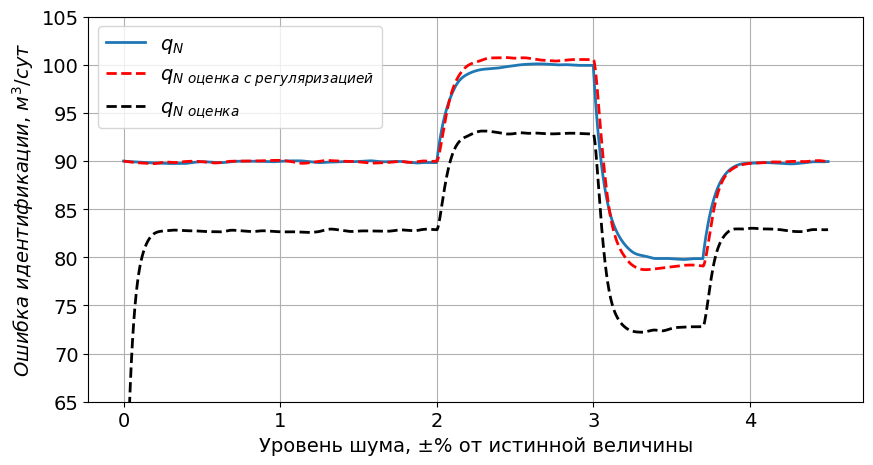

In [125]:
plot_data = [
             (PlotData(df['q'], '', 2, 'q_N'),
              PlotData(df1['q'], 'r--', 2, 'q_{N\ оценка\ с\ регуляризацией}'),
              PlotData(df2['q'], 'k--', 2, 'q_{N\ оценка}')
              ),


            ]

build_plot(df['x'], plot_data, None, y_scale = [Scale(min=65, max=105)], mu='$м^3/сут$')

<>:7: SyntaxWarning: invalid escape sequence '\o'
<>:7: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipython-input-2387633094.py:7: SyntaxWarning: invalid escape sequence '\o'
  (PlotData(df['u'], 'k', 1, '\omega'),


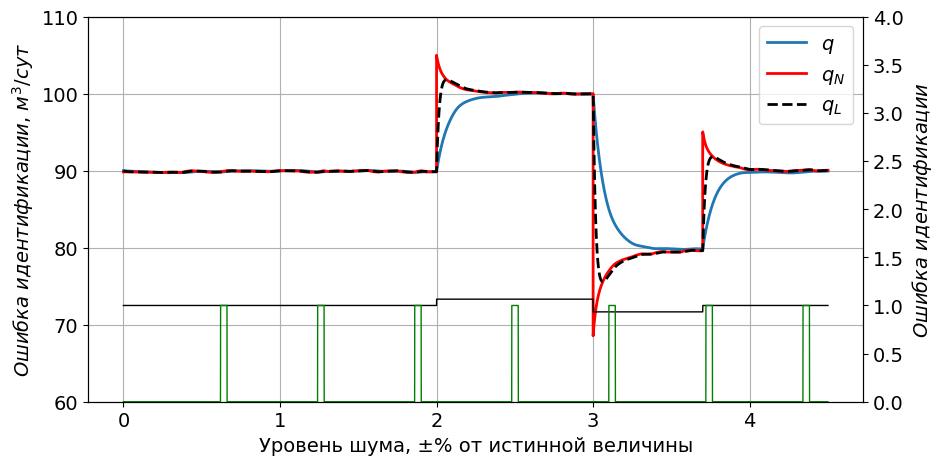

In [126]:
plot_data = [
             (PlotData(df['q'], '', 2, 'q'),
              PlotData(df['q_N'], 'r', 2, 'q_N'),
              PlotData(df['q_L'], 'k--', 2, 'q_L')
              ),

             (PlotData(df['u'], 'k', 1, '\omega'),
              PlotData(df['agzu'], 'g', 1, 'АГЗУ')
              ),
            ]

build_plot(df['x'], plot_data, None, y_scale = [Scale(min=60, max=110), Scale(min=0, max=4)], mu='$м^3/сут$')

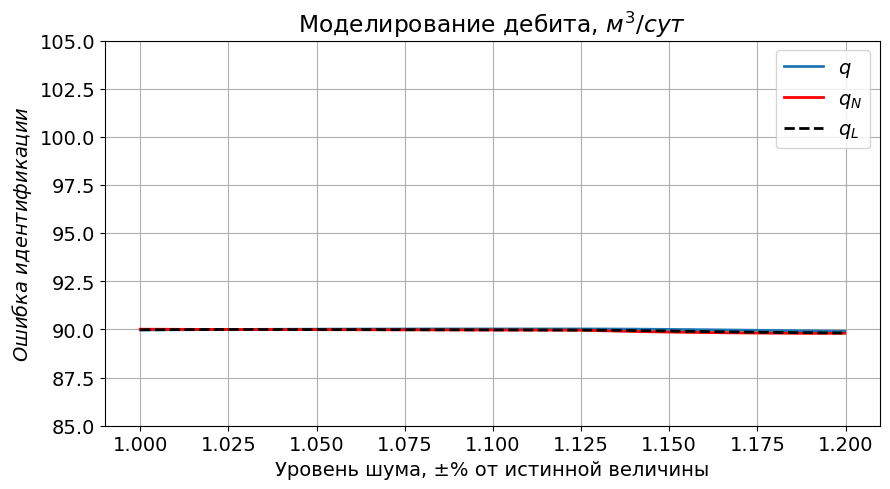

In [127]:
plot_data = [
             (PlotData(df['q'], '', 2, 'q'),
              PlotData(df['q_N'], 'r', 2, 'q_N'),
              PlotData(df['q_L'], 'k--', 2, 'q_L')),
            ]

build_plot(df['x'], plot_data, 'Моделирование дебита, $м^3/сут$', y_scale = [Scale(min=85, max=105)], x_scale=Scale(min=1, max=1.2))

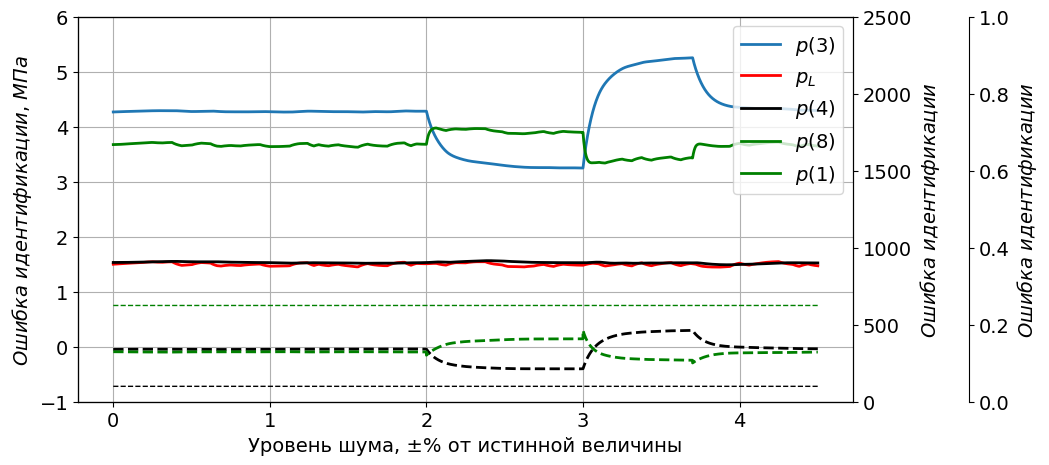

In [128]:
plot_data = [
             (PlotData(df['p_3'], '', 2, 'p(3)'),
              PlotData(df['p_L'], 'r', 2, 'p_L'),
              PlotData(df['p_4'], 'k', 2, 'p(4)'),
              PlotData(df['p_8'], 'g', 2, 'p(8)'),
              PlotData(df['p_1'], 'g', 2, 'p(1)'),
              ),

             (PlotData(df['h_4'], 'k--', 2, 'h(4)'),
              PlotData(pd.Series([h_lim]*K_NUMBERS), 'k--', 1, 'h(4)_{lim}')
              ),

             (PlotData(df['betta_GN'], 'g--', 2, '\\beta_{GN}'),
              PlotData(pd.Series([betta_G_lim]*K_NUMBERS), 'g--', 1, '\\beta_{GNlim}')
              ),
            ]

build_plot(df['x'], plot_data, None, y_scale = [Scale(min=-1, max=6), Scale(min=0, max=2500), Scale(min=0, max=1)], mu='$МПа$')

In [129]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from datetime import datetime, timedelta


class Meter:

  def __init__(self):
    self.noise_enable = False
    self.noise_amplitude = 0.01

  def measure(self, df, quant_step=0.1, denominator=7):
    """Сделать выборку измерений"""

    ident_k = (K_NUMBERS//denominator)
    ident_dt = dt * denominator

    if quant_step is not None:

      df_ident = pd.DataFrame({'p_3': [np.round(index / quant_step) * quant_step for index in self.add_noise(df['p_3'])[::denominator]],
                               'p_4': [np.round(index / quant_step) * quant_step for index in self.add_noise(df['p_4'])[::denominator]],
                               'p_8': [np.round(index / quant_step) * quant_step for index in self.add_noise(df['p_8'])[::denominator]],
                               'p_L': [np.round(index / quant_step) * quant_step for index in self.add_noise(df['p_L'])[::denominator]],
                               'x': [_x for _x in df['x'][::denominator]],
                               })
    else:
      df_ident = pd.DataFrame({'p_3': [_x for _x in self.add_noise(df['p_3'])[::denominator]],
                               'p_4': [_x for _x in self.add_noise(df['p_4'])[::denominator]],
                               'p_8': [_x for _x in self.add_noise(df['p_8'])[::denominator]],
                               'p_L': [_x for _x in self.add_noise(df['p_L'])[::denominator]],
                               'x': [_x for _x in df['x'][::denominator]],
                               })

    return ident_dt, ident_k, df_ident

  def add_noise(self, data):
    if self.noise_enable:
      return add_noise(data, hf_amplitude=self.noise_amplitude)[0]

    return data


def get_with_error(val, hf_amplitude):
  return 1.5 * random.uniform(-hf_amplitude/2, hf_amplitude/2)


def generate_hf_noise(arr, hf_amplitude):
  return [get_with_error(val, hf_amplitude=hf_amplitude) for i, val in enumerate(arr)]


def add_noise(clean_data,
              dt=dt,
              lf_amplitude=0.02,
              hf_amplitude=0.01,
              lf_cutoff=0.5):
    """
    Добавляет низкочастотный и высокочастотный шум к данным давления с привязкой к суточному времени

    Параметры:
    clean_data - массив чистых данных давления
    sample_interval_min - интервал между измерениями в минутах
    lf_amplitude - амплитуда низкочастотного шума (доля от диапазона данных)
    hf_amplitude - амплитуда высокочастотного шума (доля от диапазона данных)
    lf_cutoff - частота среза для НЧ шума
    random_seed - зерно для генератора случайных чисел

    Возвращает:
    noisy_data - зашумленные данные
    lf_noise - низкочастотный шум
    hf_noise - высокочастотный шум
    """

    n = len(clean_data)
    data_range = np.max(clean_data) - np.min(clean_data)

    fs = 1.0 / dt  # частота дискретизации

    # 1. Генерация низкочастотного шума (дрейф)
    # Для суточных данных НЧ шум должен быть очень низкочастотным
    b, a = signal.butter(2, lf_cutoff / (fs/2), 'low')
    lf_noise = signal.lfilter(b, a, np.random.randn(n))
    lf_noise = lf_amplitude * data_range * (lf_noise / np.max(np.abs(lf_noise)))

    # 2. Генерация высокочастотного шума
    hf_noise = generate_hf_noise(clean_data, hf_amplitude)

    # 3. Комбинация шумов с чистыми данными
    noisy_data = clean_data + hf_noise #+ lf_noise

    return noisy_data, lf_noise, hf_noise

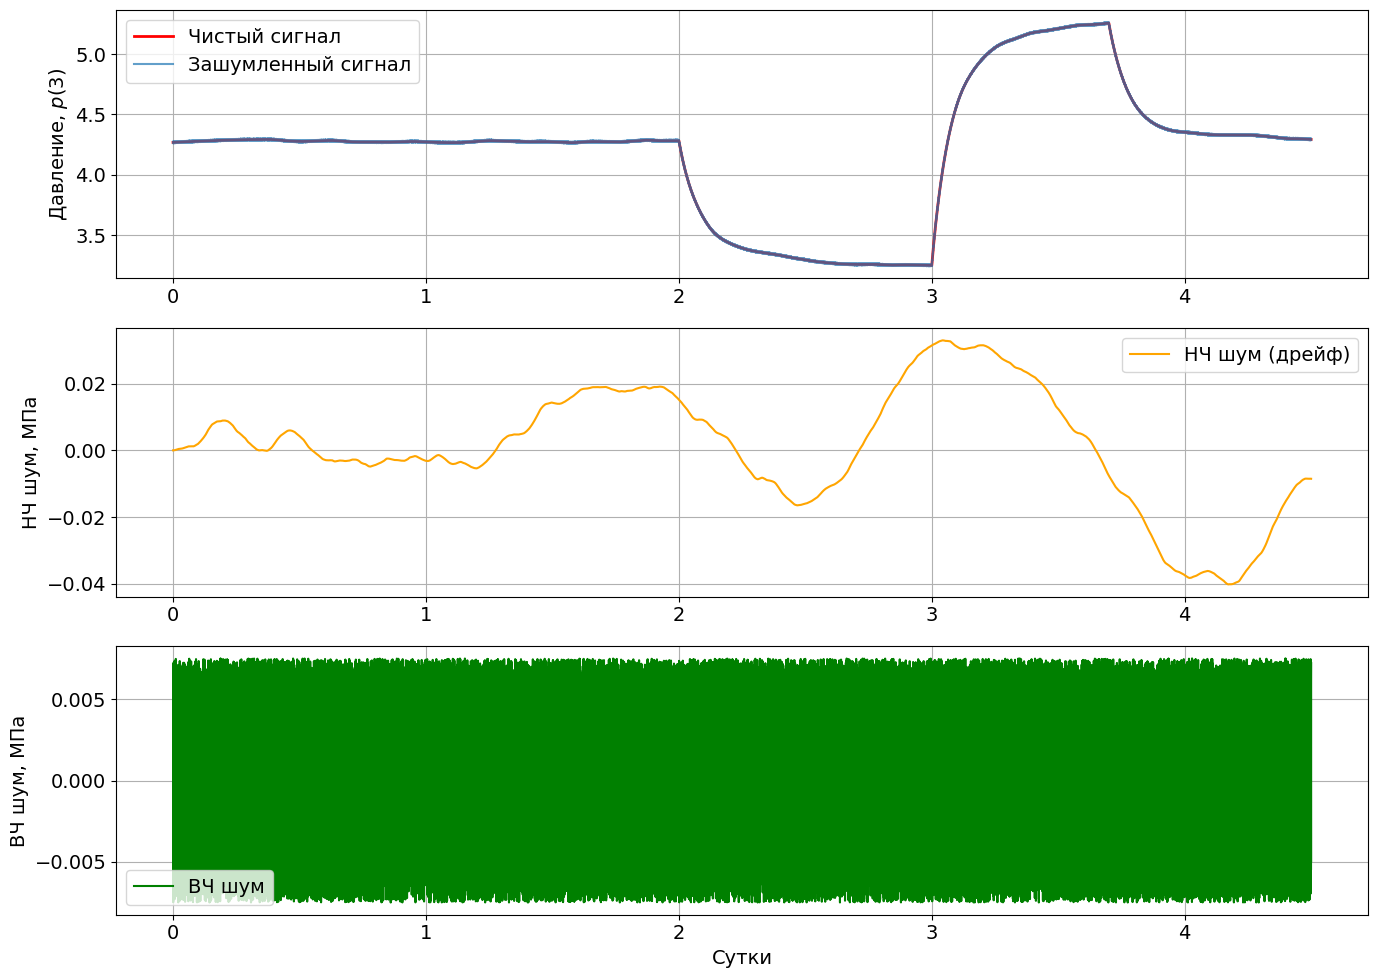

In [130]:
    # Добавление шумов
    clean_pressure = df['p_3']

    # Добавление шумов
    noisy_pressure, lf_noise, hf_noise = add_noise(clean_pressure)

    # Визуализация
    plt.figure(figsize=(14, 10))

    # График давления
    plt.subplot(3, 1, 1)
    plt.plot(df['x'], clean_pressure, label='Чистый сигнал', color='r', lw=2)
    plt.plot(df['x'], noisy_pressure, label='Зашумленный сигнал', alpha=0.7)
    plt.ylabel('Давление, $p(3)$')

    plt.legend()
    plt.grid()

    # График НЧ шума
    plt.subplot(3, 1, 2)
    plt.plot(df['x'], lf_noise, label='НЧ шум (дрейф)', color='orange')
    plt.ylabel('НЧ шум, МПа')
    plt.legend()
    plt.grid()

    # График ВЧ шума
    plt.subplot(3, 1, 3)
    plt.plot(df['x'], hf_noise, label='ВЧ шум', color='green')
    plt.ylabel('ВЧ шум, МПа')
    plt.xlabel('Сутки')
    plt.legend()
    plt.grid()


    plt.tight_layout()
    plt.show()

In [131]:
meter = Meter()
meter.noise_enable = True
meter.noise_amplitude = 0.05
ident_dt, ident_k, df_ident = meter.measure(df, quant_step=None, denominator = 50)

In [132]:
#df_ident.to_excel("model_measure.xlsx")

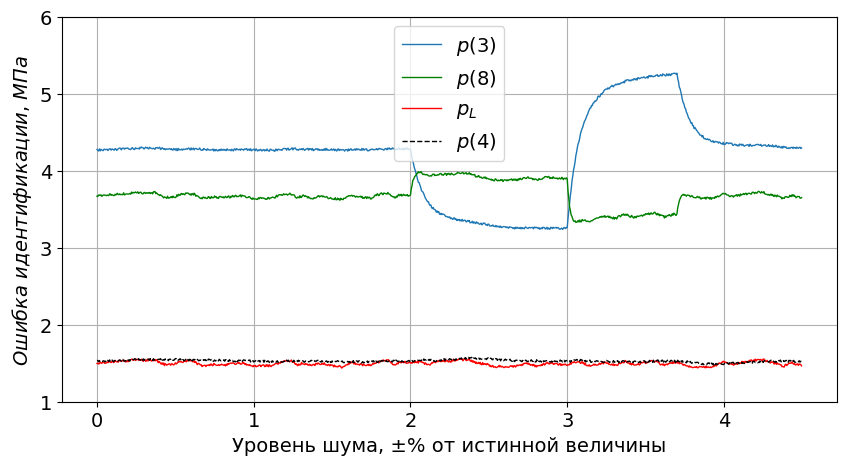

In [133]:
plot_data = [
             (PlotData(df_ident['p_3'], '', 1, 'p(3)'),
              PlotData(df_ident['p_8'], 'g', 1, 'p(8)'),
              PlotData(df_ident['p_L'], 'r', 1, 'p_L'),
              PlotData(df_ident['p_4'], 'k--', 1, 'p(4)'),
              ),

            ]

build_plot(df_ident['x'], plot_data, None, y_scale = [Scale(min=1, max=6)], mu='$МПа$')

In [134]:
# Идентификация через фильтр

from dataclasses import dataclass, field
import scipy

from scipy.signal import medfilt


@dataclass
class CalculatedValues:
  values: list[float] = field(default_factory=list)

  def add(self, element):
    self.values.append(element)

def ident_values(ident_k, ident_dt, df_ident, well):
  calc_q_L = CalculatedValues()
  calc_dp = CalculatedValues()
  calc_dp_t = CalculatedValues()
  calc_q_t = CalculatedValues()
  calc_p_1_t = CalculatedValues()
  calc__q_t = CalculatedValues()

  for _k in range(ident_k):

    b_betta_L = well.b_0 - well.b_1*(well.params.p_G0 - df_ident['p_L'][_k])


    q_L = (b_betta_L/(well.oil.gamma*well.params.r_U))*(df_ident['p_8'][_k]-df_ident['p_L'][_k])

    dp = (df_ident['p_3'][_k]-df_ident['p_4'][_k])

    b_betta_3 = well.b_0 - well.params.alpha_G_3 * well.b_1 * (well.params.p_G0 - df_ident['p_3'][_k])

    if _k == 0:
      dp_t = dp
      b_betta_3_t = b_betta_3

    q_t = q_L + ((well.params.S_t/(well.oil.gamma*well.pump.t_N)) * (dp - dp_t))

    if _k == 0:
      _q_t = q_t
      _p_3 = df_ident['p_3'][0]

    p_1_t = _p_3 + (well.oil.gamma/b_betta_3_t)*(well.params.H_R-well.pump.H_N+well.params.r_K*q_t)

    calc_q_L.add(q_L)
    calc_dp.add(dp)
    calc_dp_t.add(dp_t)
    calc_q_t.add(q_t)
    calc_p_1_t.add(p_1_t)
    calc__q_t.add(_q_t)

    dp_t = dp_t + (ident_dt/well.pump.t_N)*(dp - dp_t)
    _q_t = _q_t + (ident_dt/well.reservoir.T_2)*(q_t - _q_t)
    _p_3 = _p_3 + (ident_dt/well.pump.t_N)*(df_ident['p_3'][_k] - _p_3)
    b_betta_3_t = b_betta_3_t + (ident_dt/well.pump.t_N)*(b_betta_3 - b_betta_3_t)

  calc_df = pd.DataFrame({'q_L': calc_q_L.values,
                          'dp': calc_dp.values,
                          'dp_t': calc_dp_t.values,
                          'q_t': calc_q_t.values,
                          'p_1_t': calc_p_1_t.values,
                          '_q_t': calc__q_t.values,
                          })

  return calc_df

def identificate(calc_df, ident_k):
  X = np.array([[1 for _ in range(ident_k)],
              calc_df['q_t']*-1,
              calc_df['_q_t']*-1]).T
  y = np.array(calc_df['p_1_t']).T
  b, squared_error_sum, matrix_rank, SVD_ = scipy.linalg.lstsq(X, y)
  return b

def get_static_data(calc_df, ident_k, denominator, s_times):

  s_q_t = []
  s_p_t = []

  for start, end in s_times:
    start_index = int((start / dt) // denominator)
    end_index = int((end / dt) // denominator)

    s_q_t.append(calc_df['_q_t'][start_index:end_index])
    s_p_t.append(calc_df['p_1_t'][start_index:end_index])

  s_q_t = pd.concat(s_q_t)
  s_p_t = pd.concat(s_p_t)

  k_s = len(s_q_t)

  m2 = ident_k / k_s
  return s_q_t, s_p_t, m2, k_s

def identificate_regul(calc_df, ident_k, denominator, v_r, s_q_t, s_p_t, m2, k_s):

  # формируем и заполняем матрицу размерностью 2x2
  A1 = np.empty((3, 3))
  A1[[0], [0]] = ident_k
  A1[[0], [1]] = -sum(calc_df['q_t'])
  A1[[0], [2]] = -sum(calc_df['_q_t'])

  A1[[1], [0]] = -sum(calc_df['q_t'])
  A1[[1], [1]] = sum([value**2 for value in calc_df['q_t']])
  A1[[1], [2]] = sum([calc_df['_q_t'][i]*calc_df['q_t'][i] for i in range(ident_k)])

  A1[[2], [0]] = -sum(calc_df['_q_t'])
  A1[[2], [1]] = sum([calc_df['_q_t'][i]*calc_df['q_t'][i] for i in range(ident_k)])
  A1[[2], [2]] = sum([value**2 for value in calc_df['_q_t']])

  A2 = np.empty((3, 3))
  A2[[0], [0]] = k_s
  A2[[0], [1]] = -sum(s_q_t)
  A2[[0], [2]] = -sum(s_q_t)

  A2[[1], [0]] = -sum(s_q_t)
  A2[[1], [1]] = sum([value**2 for value in s_q_t])
  A2[[1], [2]] = sum([value**2 for value in s_q_t])

  A2[[2], [0]] = -sum(s_q_t)
  A2[[2], [1]] = sum([value**2 for value in s_q_t])
  A2[[2], [2]] = sum([value**2 for value in s_q_t])

  A2 = m2 * A2

  A3 = np.empty((3, 3))
  A3[[0], [0]] = 0
  A3[[0], [1]] = 0
  A3[[0], [2]] = 0

  A3[[1], [0]] = 0
  A3[[1], [1]] = 1
  A3[[1], [2]] = -v_r

  A3[[2], [0]] = 0
  A3[[2], [1]] = -v_r
  A3[[2], [2]] = v_r * v_r

  A3 = ident_k * A3

  A = A1 + A2 + A3

  # находим обратную матрицу
  A = np.linalg.inv(A)
  # формируем и заполняем матрицу размерностью 3x1
  C1 = np.empty((3, 1))
  C1[0] = sum(calc_df['p_1_t'])
  C1[1] = -sum([calc_df['p_1_t'][i]*calc_df['q_t'][i] for i in range(ident_k)])
  C1[2] = -sum([calc_df['p_1_t'][i]*calc_df['_q_t'][i] for i in range(ident_k)])

  C2 = np.empty((3, 1))
  C2[0] = sum(s_p_t)
  C2[1] = -sum([s_p_t[i]*s_q_t[i] for i in range(k_s)])
  C2[2] = -sum([s_p_t[i]*s_q_t[i] for i in range(k_s)])

  C2 = m2 * C2

  C = C1 + C2

  # умножаем матрицу на вектор
  ww = np.dot(A, C)
  return ww


def calc_sco(p_R, r_1, r_2, reservoir):
  res = 0

  res += ((p_R/reservoir.p_R)-1)**2
  res += ((r_1/reservoir.r_1)-1)**2
  res += ((r_2/reservoir.r_2)-1)**2

  return float(res)

def calc_rsd(arr, true_val):
  avg = sum(arr) / len(arr)

  error = 0
  for val in arr:
    error += (val - avg)**2

  avg_error = np.sqrt(error / len(arr))

  return avg_error/true_val

def calc_error(calc, true_val):
  return abs(float(((true_val-calc)/true_val) * 100))

In [135]:
quant_step_list = np.arange(0.001, 0.15, 0.006)
denominator_list = np.arange(1, 51, 2)


quant_step_list = [None]
denominator_list = [20]
experiment_num_max = 50

noise_list = np.arange(0, 10, 0.2)

denominator_list_minutes = [rec * dt * 24 * 60 for rec in denominator_list]

In [136]:
np.random.seed(None)
random.seed(None)

res = {'p_R': [],
       'r_1': [],
       'r_2': [],
       'sco': np.zeros((len(quant_step_list), len(denominator_list), len(noise_list) )),
       'sco_p_R': np.zeros((len(quant_step_list), len(denominator_list), len(noise_list) )),
       'sco_r_1': np.zeros((len(quant_step_list), len(denominator_list), len(noise_list) )),
       'sco_r_2': np.zeros((len(quant_step_list), len(denominator_list), len(noise_list) )),
        }

res_regul = {'p_R': [],
       'r_1': [],
       'r_2': [],
       'sco': np.zeros((len(quant_step_list), len(denominator_list), len(noise_list))),
       'sco_p_R': np.zeros((len(quant_step_list), len(denominator_list), len(noise_list) )),
       'sco_r_1': np.zeros((len(quant_step_list), len(denominator_list), len(noise_list) )),
       'sco_r_2': np.zeros((len(quant_step_list), len(denominator_list), len(noise_list) )),
        }

meter = Meter()
meter.noise_enable = True

for i, quant_step in enumerate(quant_step_list):
  for j, denominator in enumerate(denominator_list):
    for k, noise in enumerate(noise_list):

      res['p_R'] = []
      res['r_1'] = []
      res['r_2'] = []

      res_regul['p_R'] = []
      res_regul['r_1'] = []
      res_regul['r_2'] = []

      for experiment_num in range(1, experiment_num_max):

        meter.noise_amplitude = noise/100

        ident_dt, ident_k, df_ident = meter.measure(df, quant_step=quant_step, denominator=denominator)

        calc_df = ident_values(ident_k, ident_dt, df_ident, well)

        b = identificate(calc_df, ident_k)

        s_times = [(1, 1.8)]
        s_q_t, s_p_t, m2, k_s = get_static_data(calc_df, ident_k, denominator, s_times)
        b_regul = identificate_regul(calc_df, ident_k, denominator, well.reservoir.v_r, list(s_q_t), list(s_p_t), m2, k_s).T[0]

        res['p_R'].append(b[0])
        res['r_1'].append(b[1])
        res['r_2'].append(b[2])

        res_regul['p_R'].append(b_regul[0])
        res_regul['r_1'].append(b_regul[1])
        res_regul['r_2'].append(b_regul[2])


      res['sco_p_R'][i, j, k] = calc_rsd(res['p_R'], well.reservoir.p_R)
      res['sco_r_1'][i, j, k] = calc_rsd(res['r_1'], well.reservoir.r_1)
      res['sco_r_2'][i, j, k] = calc_rsd(res['r_2'], well.reservoir.r_2)
      res['sco'][i, j, k] = res['sco_p_R'][i, j, k] + res['sco_r_1'][i, j, k] + res['sco_r_2'][i, j, k]


      res_regul['sco_p_R'][i, j, k] = calc_rsd(res_regul['p_R'], well.reservoir.p_R)
      res_regul['sco_r_1'][i, j, k] = calc_rsd(res_regul['r_1'], well.reservoir.r_1)
      res_regul['sco_r_2'][i, j, k] = calc_rsd(res_regul['r_2'], well.reservoir.r_2)
      res_regul['sco'][i, j, k] = res_regul['sco_p_R'][i, j, k] + res_regul['sco_r_1'][i, j, k] + res_regul['sco_r_2'][i, j, k]

    print(k)


49


In [137]:
from scipy.signal import savgol_filter


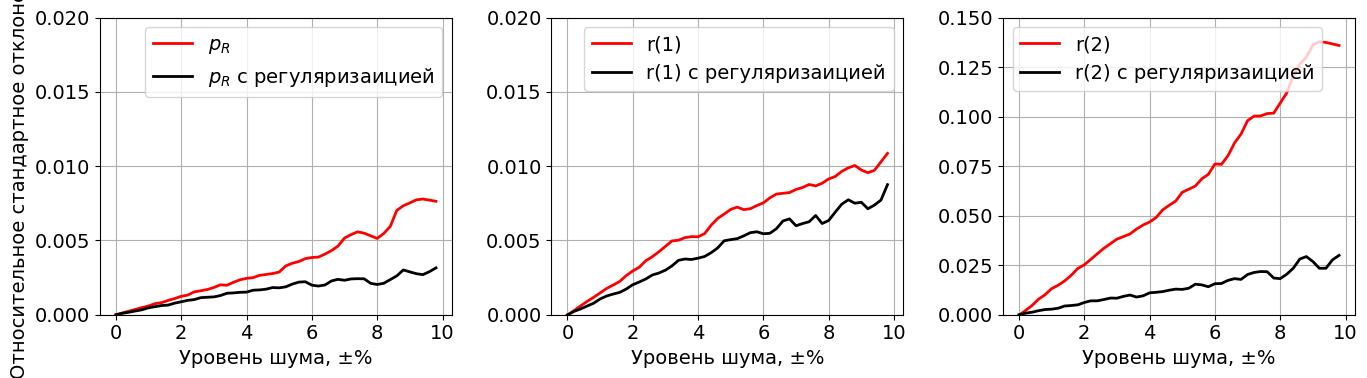

In [183]:
    # Визуализация
    plt.figure(figsize=(14, 4))


    # График давления
    plt.subplot(1, 3, 1)
    plt.plot(noise_list, savgol_filter(res['sco_p_R'][0,0], 5, 1), label='$p_R$', color='r', lw=2)
    plt.plot(noise_list, savgol_filter(res_regul['sco_p_R'][0,0],3,1), label='$p_R$ с регуляризаицией', color='k', lw=2)
    plt.xlabel('Уровень шума, ±%')
    plt.ylabel('Относительное стандартное отклонение')
    plt.legend()
    plt.grid()
    plt.ylim(0, 0.02)

    # График НЧ шума
    plt.subplot(1, 3, 2)
    plt.plot(noise_list, savgol_filter(res['sco_r_1'][0,0], 5, 1), label='r(1)', color='r', lw=2)
    plt.plot(noise_list, savgol_filter(res_regul['sco_r_1'][0,0],3,1), label='r(1) с регуляризаицией', color='k', lw=2)
    plt.xlabel('Уровень шума, ±%')
    plt.legend()
    plt.grid()
    plt.ylim(0, 0.02)

    # График ВЧ шума
    plt.subplot(1, 3, 3)
    plt.plot(noise_list, savgol_filter(res['sco_r_2'][0,0], 6, 1), label='r(2)', color='r', lw=2)
    plt.plot(noise_list, savgol_filter(res_regul['sco_r_2'][0,0], 2, 1), label='r(2) с регуляризаицией', color='k', lw=2)
    plt.xlabel('Уровень шума, ±%')
    plt.legend()
    plt.grid()
    plt.ylim(0, 0.15)


    plt.tight_layout()
    plt.show()

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2662816914.py:4: SyntaxWarning: invalid escape sequence '\s'
  (PlotData(savgol_filter(res['sco'][0,0], 5, 1), 'r', 2, '\sigma'),
/tmp/ipython-input-2662816914.py:5: SyntaxWarning: invalid escape sequence '\d'
  PlotData(res_regul['sco'][0,0], 'k--', 2, '\delta\\ с\\ регуляризацией'),


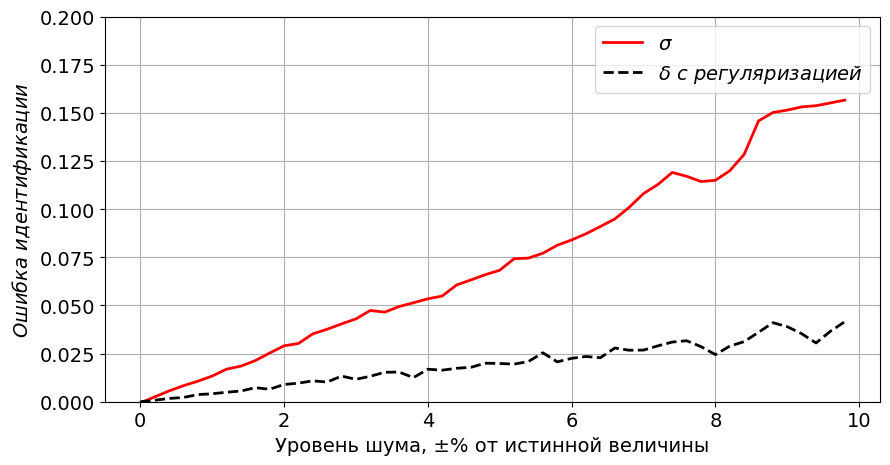

In [185]:
#

plot_data = [
             (PlotData(savgol_filter(res['sco'][0,0], 5, 1), 'r', 2, '\sigma'),
              PlotData(res_regul['sco'][0,0], 'k--', 2, '\delta\\ с\\ регуляризацией'),
              ),

            ]

build_plot(noise_list, plot_data, None, y_scale = [Scale(min=0, max=0.2)], mu='')

In [140]:
#from scipy.ndimage import gaussian_filter
#mse = res['sco']
#MSE_smoothed = gaussian_filter(mse, sigma=1.5)
#
#X, Y = np.meshgrid(denominator_list_minutes,  quant_step_list)
#fig = plt.figure(figsize=(10, 10))
#ax = fig.add_subplot(111, projection='3d')
#ax.view_init(elev=30, azim=30)
#ax.plot_surface(X, Y, MSE_smoothed, cmap='viridis', alpha=0.85)
#ax.set_xlabel('$dt_и$, минут')
#ax.set_ylabel('Квант')
#plt.show()

In [187]:
(well.reservoir.p_R - sum(res_regul['p_R']) / len(res_regul['p_R'])) / well.reservoir.p_R

np.float64(0.11076379044429221)

In [142]:
sum(res_regul['r_1']) / len(res_regul['r_1'])

np.float64(0.04849473424887077)

In [143]:
sum(res_regul['r_2']) / len(res_regul['r_2'])

np.float64(0.024933929630879568)

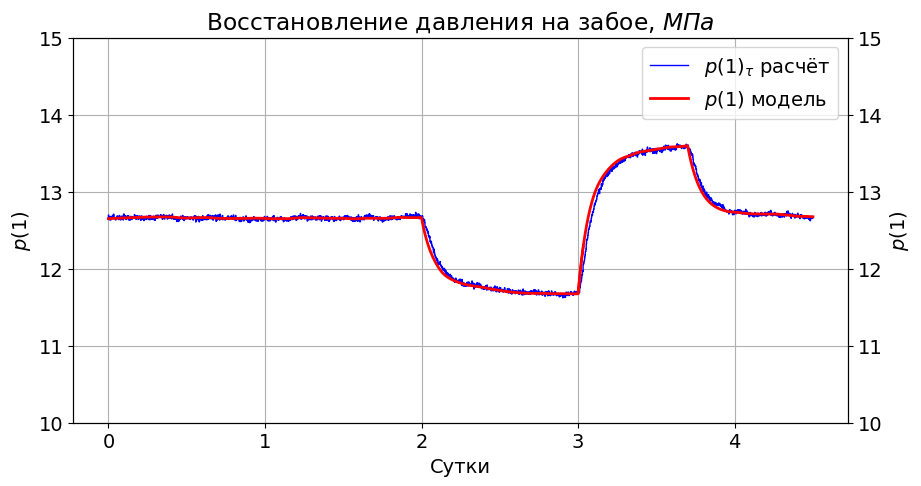

In [144]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(10, 5))

twin1 = ax.twinx()

p2, = twin1.step(df['x'], df['p_1'], 'r', lw=2, label="$p(1)$ модель")
p1, = ax.step(df_ident['x'], calc_df['p_1_t'], 'b', lw=1, label=r"$p(1)_\tau$ расчёт")


ax.set(ylim=(10, 15), xlabel="Сутки", ylabel="$p(1)$")
twin1.set(ylim=(10, 15), ylabel="$p(1)$")

plt.title('Восстановление давления на забое, $МПа$')

ax.legend(handles=[p1, p2])
ax.grid()
plt.show()



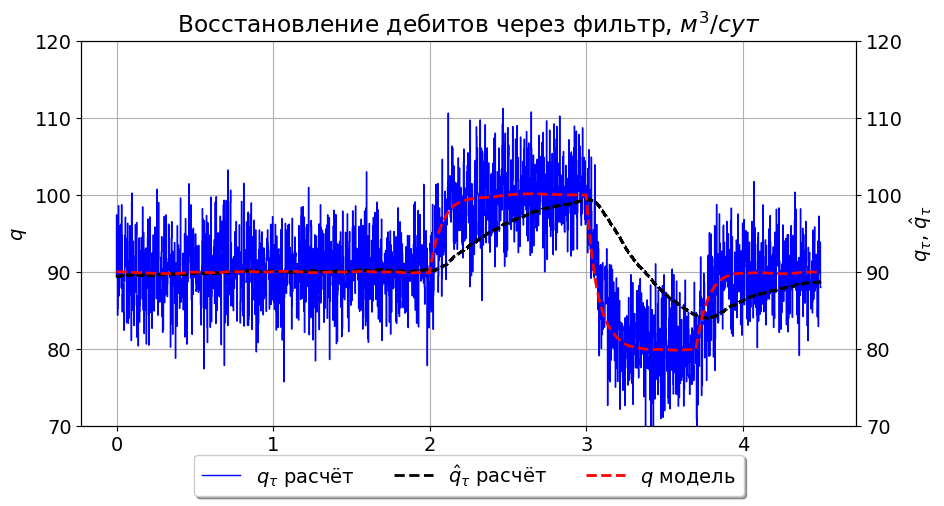

In [145]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(10, 5))

twin1 = ax.twinx()

p1, = ax.step(df_ident['x'], calc_df['q_t'], 'b', lw=1, label=r"$q_\tau$ расчёт")
p2, = ax.step(df_ident['x'], calc_df['_q_t'], 'k--', lw=2, label=r"$\^{q}_\tau$ расчёт")
p3, = twin1.plot(df['x'], df['q'], 'r--', lw=2, label="$q$ модель")


ax.set(ylim=(70, 120), xlabel="Сутки", ylabel="$q$")
twin1.set(ylim=(70, 120), ylabel=r"$q_\tau$, $\^{q}_\tau$")

plt.title('Восстановление дебитов через фильтр, $м^3/сут$')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5, handles=[p1, p2, p3])
ax.grid()
plt.show()

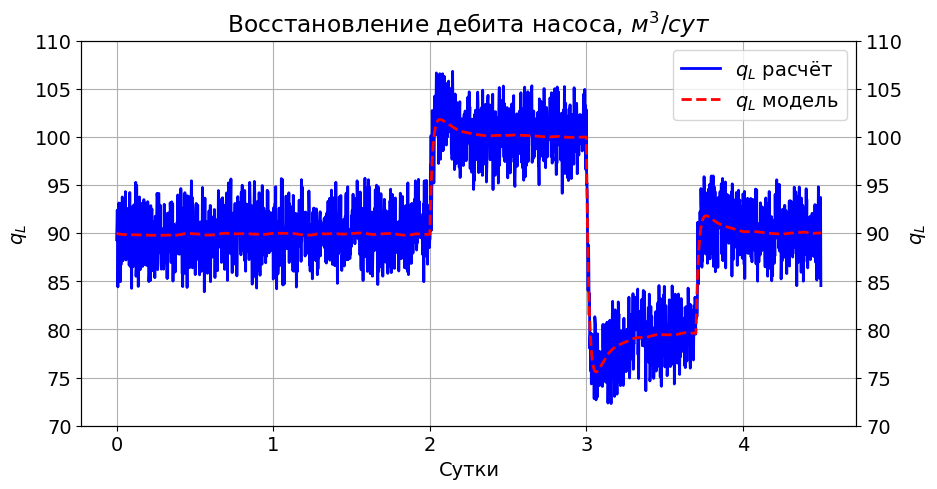

In [146]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(10, 5))

twin1 = ax.twinx()

p1, = ax.plot(df_ident['x'], calc_df['q_L'], 'b', lw=2, label=r"$q_L$ расчёт")
p2, = ax.plot(df['x'], df['q_L'], 'r--', lw=2, label="$q_L$ модель")

ax.set(ylim=(70, 110), xlabel="Сутки", ylabel="$q_L$")
twin1.set(ylim=(70, 110), ylabel=r"$q_L$")

plt.title('Восстановление дебита насоса, $м^3/сут$')

ax.legend(handles=[p1, p2])
ax.grid()
plt.show()

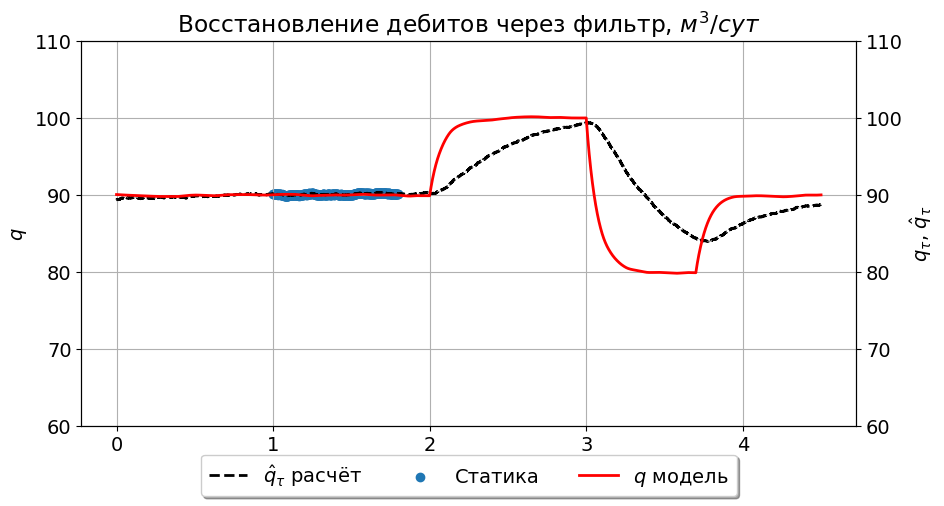

In [147]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(10, 5))

twin1 = ax.twinx()

s_time = s_q_t.index * denominator * dt

p1, = ax.step(df_ident['x'], calc_df['_q_t'], 'k--', lw=2, label=r"$\^{q}_\tau$ расчёт")
p2 = ax.scatter(s_time, s_q_t.values, label=r"Статика")
p3, = twin1.plot(df['x'], df['q'], 'r', lw=2, label="$q$ модель")


ax.set(ylim=(60, 110), xlabel="Сутки", ylabel="$q$")
twin1.set(ylim=(60, 110), ylabel=r"$q_\tau$, $\^{q}_\tau$")

plt.title('Восстановление дебитов через фильтр, $м^3/сут$')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5, handles=[p1, p2, p3])
ax.grid()
plt.show()